In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [55]:

df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [56]:
df.shape

(103, 7)

In [57]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data Cleaning

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [59]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [61]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [62]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [63]:
df.rename(columns={"Production (Tons)":"Production(Tons)","Production per Person (Kg)":"Production_per_Person(Kg)","Acreage (Hectare)":"Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [64]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [65]:
len(df)

103

In [66]:
df.dropna(inplace=True)

In [67]:
len(df)

102

In [68]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [69]:
df[df["Country"]=="Brazil"]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5


In [70]:
df["Production(Tons)"]=df["Production(Tons)"].astype("float")
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype("float")
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype("float")
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype("float")

In [71]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

## Univariate Analysis

In [72]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

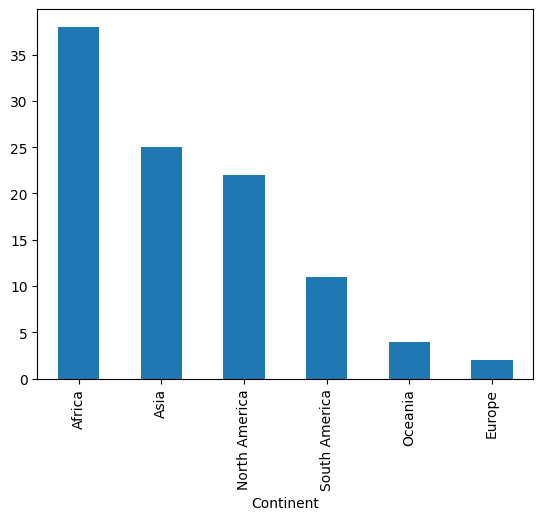

In [73]:
df["Continent"].value_counts().plot(kind="bar")

<Axes: xlabel='Continent', ylabel='count'>

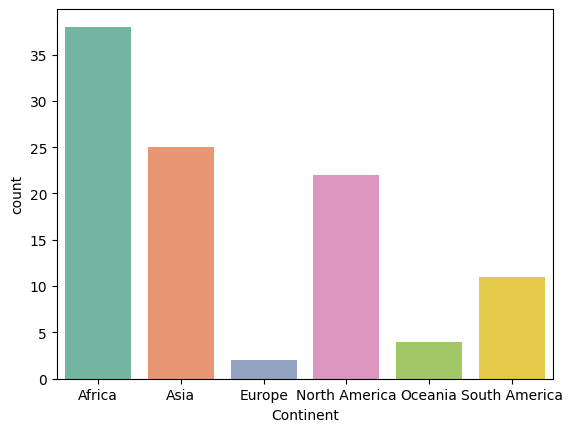

In [113]:
#or

sns.countplot(data=df.sort_values(by="Continent"), x="Continent",palette = "Set2")

In [75]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

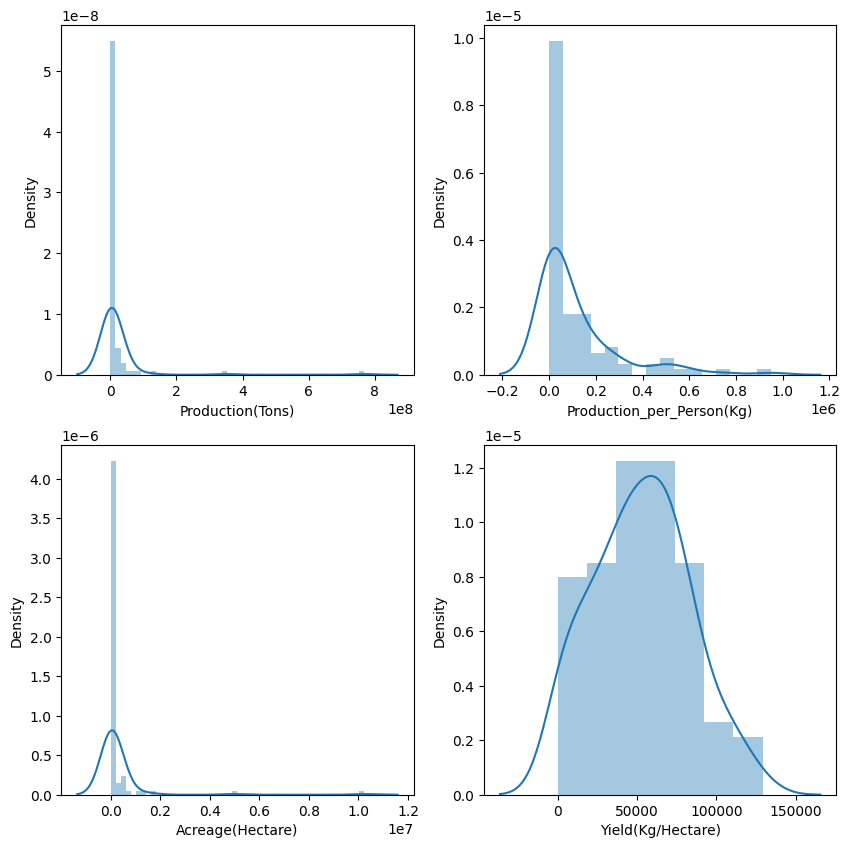

In [76]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1) # 2,2 indicaticates the number of rows and columns, and '1' indicate the position of the specific plot 
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])


In [77]:
# By graphs it is understood that first three graphs are skewed and will have outliers but the last 4th one is not skewed neither it will give any outliar

## Cheking Outliars

In [78]:
# Here we should not remove outliers since we are not gonna get the maxmimum values of sugarcane producers, which is imp

<Axes: ylabel='Yield(Kg/Hectare)'>

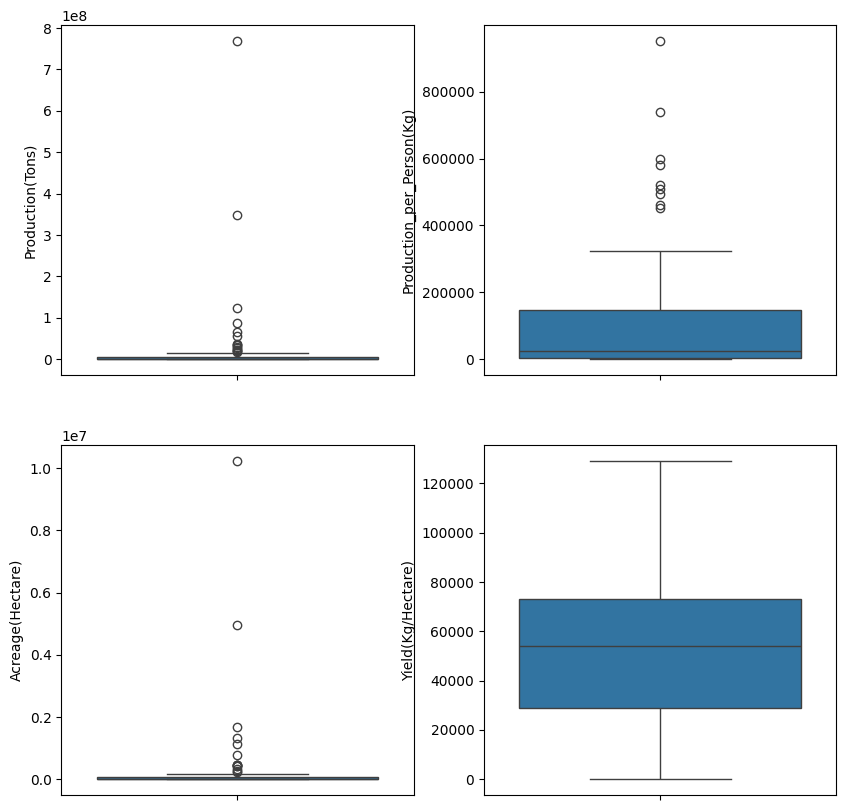

In [79]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1) # 2,2 indicaticates the number of rows and columns, and '1' indicate the position of the specific plot 
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])


In [80]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

In [81]:
df_new=df[["Country","Production(Tons)"]]
df_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
100,Singapore,50.0
101,Samoa,12.0


In [111]:
df_new.loc[:,"Production(Tons)_Percent"]=df_new.loc[:,"Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [110]:
dff=df[["Country","Production(Tons)"]]
dff["Production(Tons)_Percent"]=dff["Production(Tons)"]*100/dff["Production(Tons)"].sum()
dff

,Country,Production(Tons),Production(Tons)_Percent
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
100,Singapore,50.0,2.649176e-06
101,Samoa,12.0,6.358022e-07


In [112]:
df_new

,Country,Production(Tons),Production(Tons)_Percent
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
100,Singapore,50.0,2.649176e-06
101,Samoa,12.0,6.358022e-07


<Axes: xlabel='Country', ylabel='Production(Tons)'>

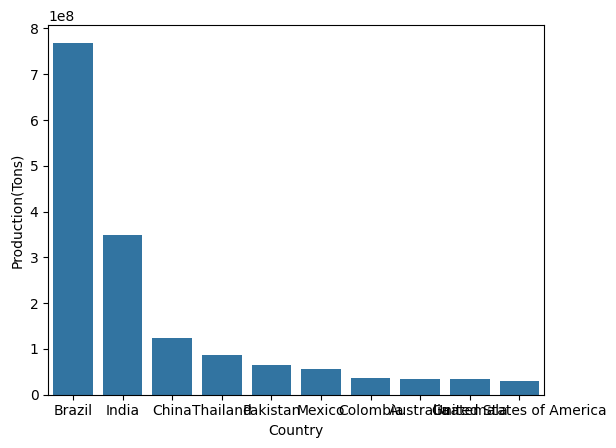

In [116]:
sns.barplot(data=df.head(10),x="Country",y="Production(Tons)",orient='v')

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

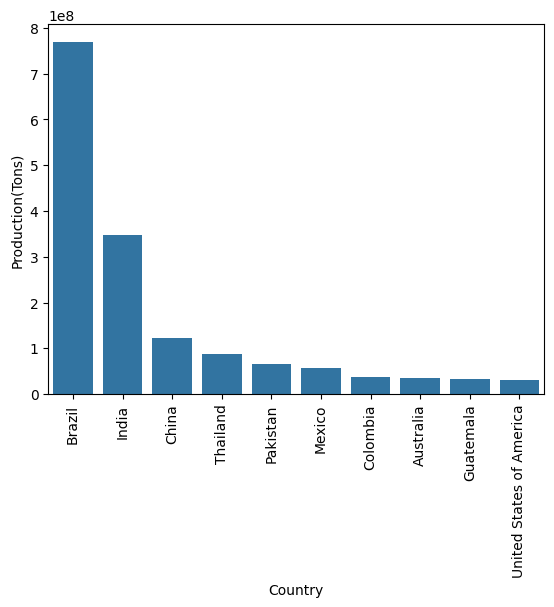

In [85]:
ax=sns.barplot(data=df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Which country has highest land?

In [86]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

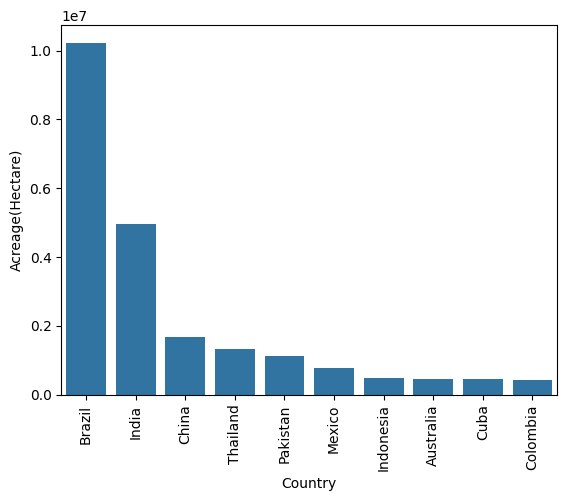

In [87]:
ax=sns.barplot(data=df.sort_values(by="Acreage(Hectare)",ascending=False).head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Which country has highest yield per heactare?

[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

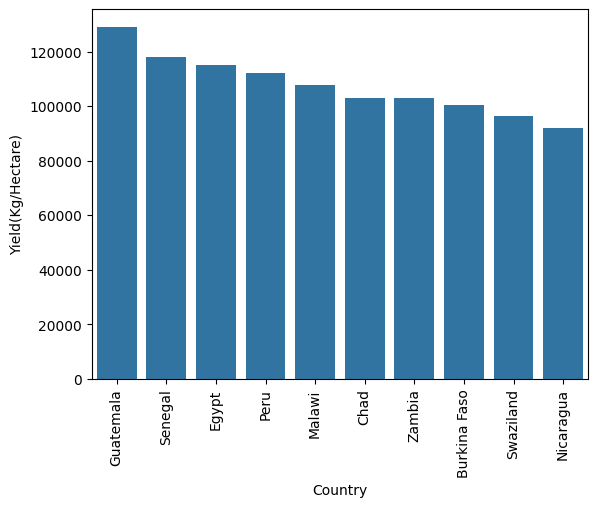

In [88]:
ax=sns.barplot(data=df.sort_values(by="Yield(Kg/Hectare)",ascending=False).head(10),x="Country",y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Which country has highest production_per_person?

### Correlation

In [89]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


In [90]:
# Only one correlation between Acreage(Tons) and Production(Tons)
# You can see this using heat map as well

<Axes: >

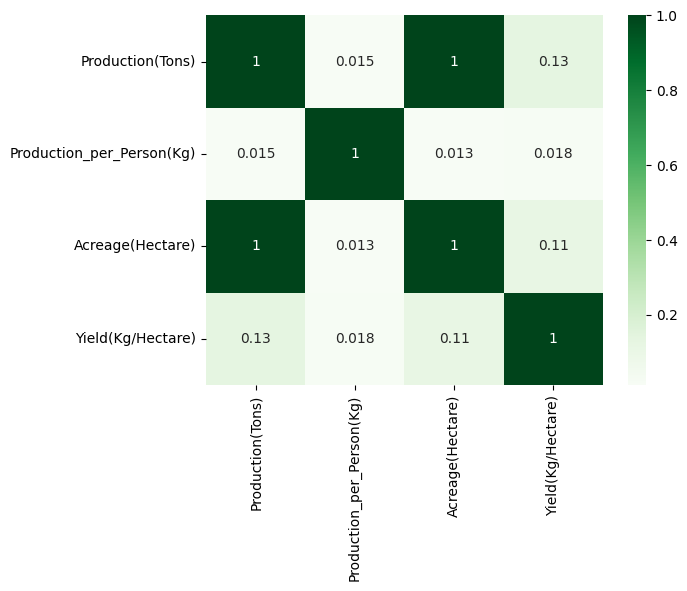

In [91]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True,cmap="Greens")

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

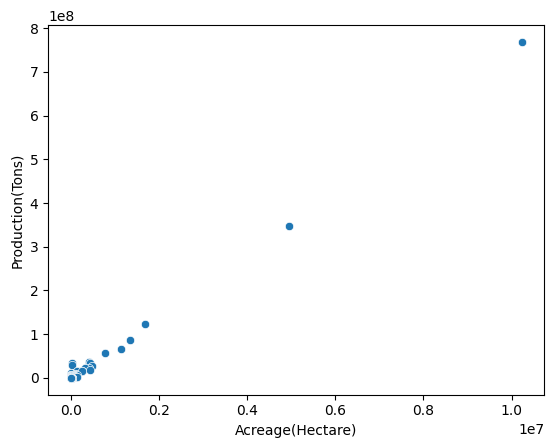

In [92]:
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")

### Do countries which yield more sugarcane per hactare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

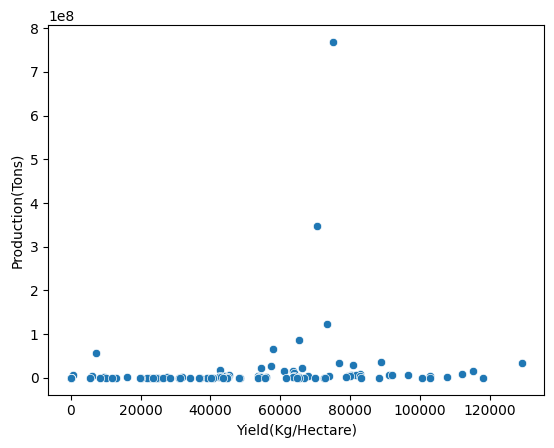

In [93]:
sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")
# No Correlation

## <font color="green">Analysis for Continent</font>

In [94]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [117]:
df.groupby("Continent").sum()

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [95]:
df_continent=df.groupby("Continent").sum()
df_continent.drop("Country",axis=1,inplace=True)
df_continent

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


### Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

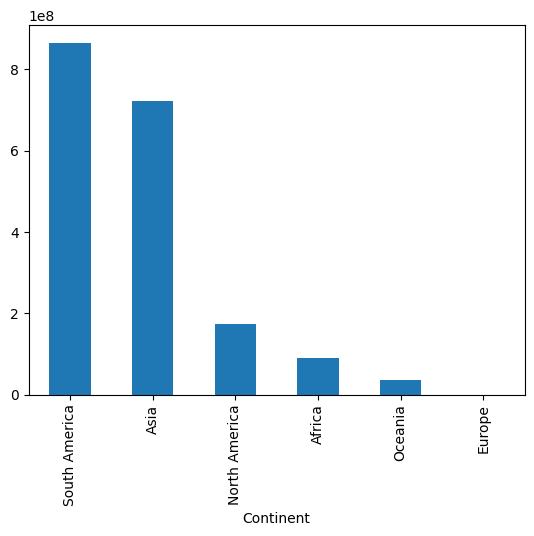

In [96]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent', ylabel='Production(Tons)'>

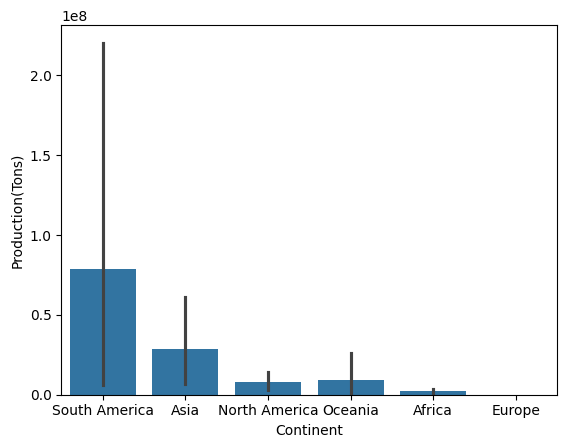

In [97]:
sns.barplot(data=df.sort_values(by="Production(Tons)",ascending=False),x="Continent",y="Production(Tons)")

<Axes: xlabel='Continent', ylabel='Acreage(Hectare)'>

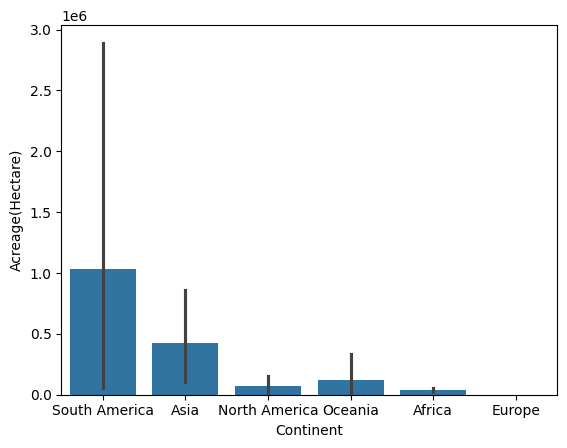

In [98]:
sns.barplot(data=df.sort_values(by="Acreage(Hectare)",ascending=False),x="Continent",y="Acreage(Hectare)")

### Do number of countries in a continent affects production of sugarcane? 

In [99]:
# no number of countries do not affect the production of continent

In [100]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [119]:
df_continent["Number_of_counties"]=df.groupby("Continent").count()["Country"]
df_continent


,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_counties
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: >

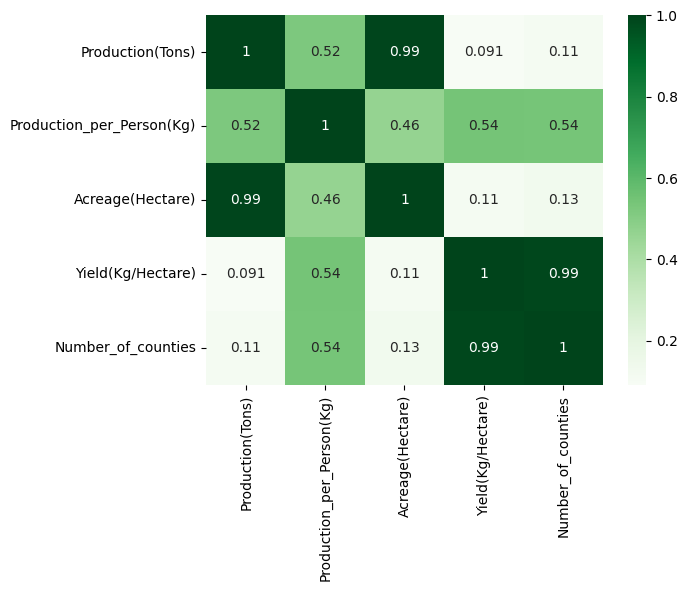

In [102]:
sns.heatmap(data=df_continent.corr(numeric_only=True),annot=True,cmap="Greens")

<Axes: xlabel='Number_of_counties', ylabel='Production(Tons)'>

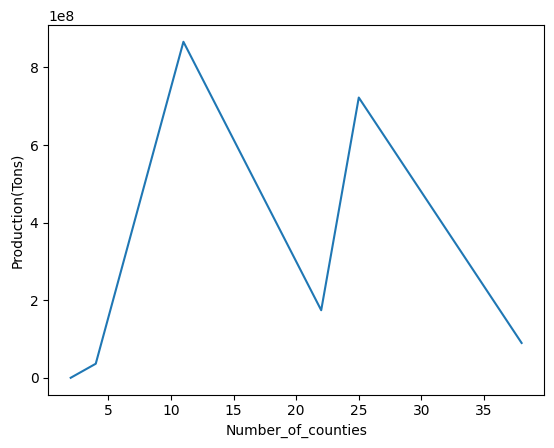

In [103]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="Number_of_counties",y="Production(Tons)")

([<matplotlib.axis.XTick at 0x1c92fe02ba0>,
 [Text(38, 0, 'Africa'),
  Text(25, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(22, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(11, 0, 'South America')])

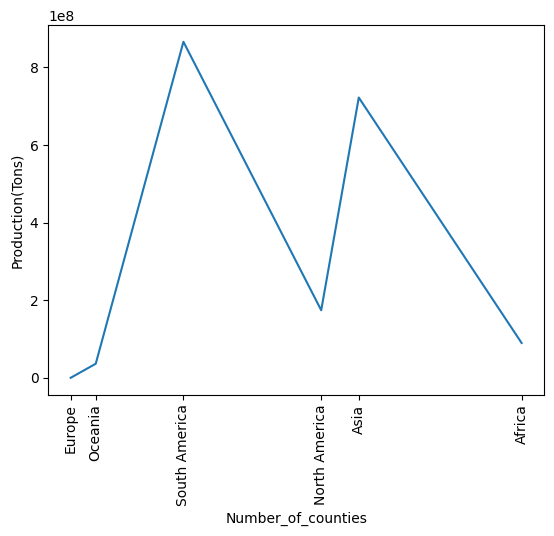

In [104]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="Number_of_counties",y="Production(Tons)")
plt.xticks(df_continent["Number_of_counties"],continent_names,rotation=90)

In [105]:
df_continent.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_counties
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number_of_counties,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: ylabel='Production(Tons)'>

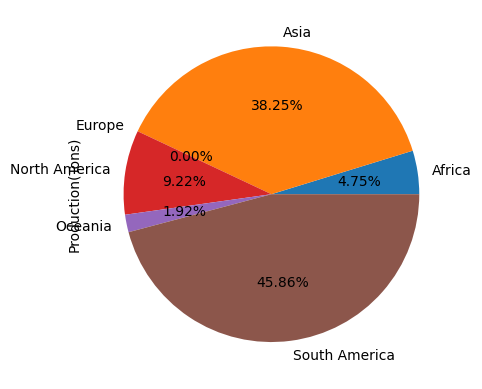

In [106]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f%%")